<a href="https://colab.research.google.com/github/soiqualang/colab/blob/master/Count_dragon_fruit_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.google.com/maps/@10.8833314,108.040307,70m/data=!3m1!1e3?entry=ttu

In [1]:
import cv2
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

Estimated number of dragon fruit trees: 44


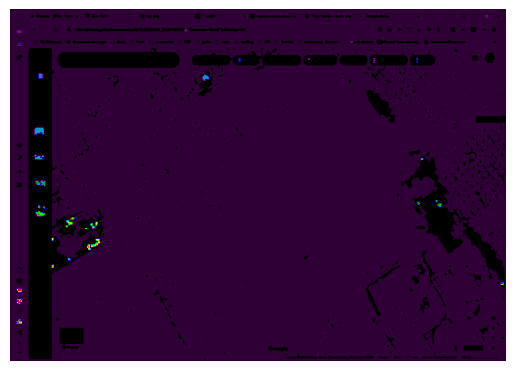

In [3]:
# Load the image
image = cv2.imread('h1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a binary image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Label connected regions of an integer array using measure.label
# If the connectivity is None, a full connectivity of input.ndim is used
labels = measure.label(opening, connectivity=None, background=0)

# Count the number of labels
tree_count = len(np.unique(labels)) - 1  # Subtract one for the background label

print(f'Estimated number of dragon fruit trees: {tree_count}')

# Optionally, visualize the labeled regions
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')
plt.show()

Estimated number of dragon fruit trees: 11


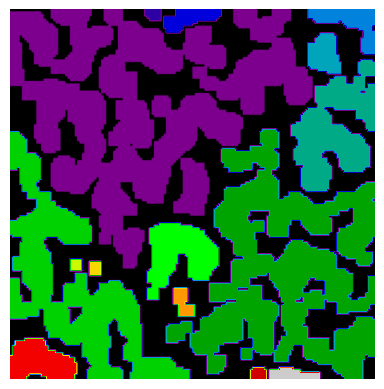

In [7]:
import cv2
from skimage import measure, filters
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('h4.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the grayscale image to remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to account for varying lighting conditions
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Dilate the image to connect components that are close to each other
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(binary, kernel, iterations=2)

# Label connected regions of an integer array using measure.label
labels = measure.label(dilated)

# Apply properties to filter out small objects that are not trees
props = measure.regionprops(labels)
tree_count = 0
for prop in props:
    if prop.area > 50:  # Assuming that trees have a certain minimum size
        tree_count += 1

print(f'Estimated number of dragon fruit trees: {tree_count}')

# Optionally, visualize the labeled regions
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')
plt.show()


Estimated number of dragon fruit trees: 0


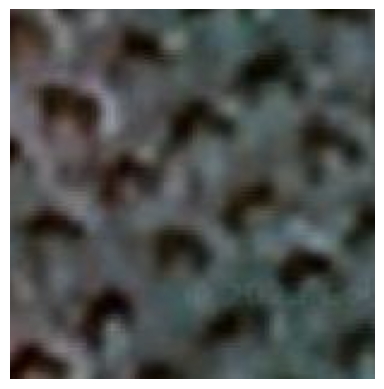

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('h4.jpg')
output = image.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a median blur to reduce noise and improve circle detection
gray_blurred = cv2.medianBlur(gray, 5)

# Use Hough Circle Transform to detect circles
# Adjust these parameters depending on the size and spacing of the trees in your image
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=10, maxRadius=30)

# Ensure at least some circles were found
if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # Loop over the circles and draw them on the image
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

    # Count the number of detected circles (trees)
    tree_count = len(circles)
else:
    tree_count = 0

print(f'Estimated number of dragon fruit trees: {tree_count}')

# Show the output image
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Estimated number of dragon fruit trees: 3


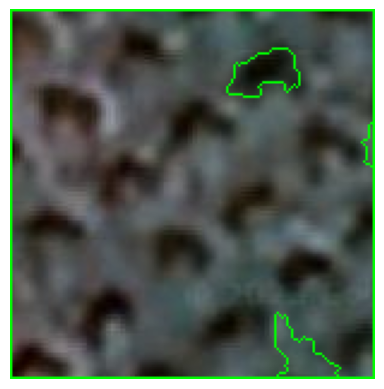

In [9]:
import cv2
from skimage import measure, morphology, segmentation
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('h4.jpg')

# Assuming dragon fruit trees are green, we might try to filter by color
# Convert to HSV (Hue, Saturation, Value) color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Define range of green color in HSV
lower_green = np.array([36, 0, 0])
upper_green = np.array([86, 255, 255])
# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)

# Morphological operations to close gaps and separate individual trees
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

# Apply the watershed algorithm to separate different tree regions
distance = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(distance, 0.7*distance.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(closing, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [0,255,0]

# Count unique markers as tree estimates
tree_count = len(np.unique(markers)) - 2  # Subtract one for the background and one for the borders

print(f'Estimated number of dragon fruit trees: {tree_count}')

# Optionally, visualize the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


----

# Final

This script includes visualization of the steps to help in tuning the parameters. The `solidity` and `eccentricity` properties are additional filters to distinguish tree-like objects; you'll need to adjust their threshold values based on the specific characteristics of the dragon fruit trees in your image.

The `eccentricity` measures the elongation of the region; for round trees, this should be low. The `solidity` measures the proportion of the pixels in the convex hull that are also in the region; for a solid round tree, this should be high.

Please adapt the `area`, `solidity`, and `eccentricity` thresholds as well as the kernel sizes and iterations of morphological operations to better fit the distribution of trees in your specific image. This code will not execute correctly in this environment due to the lack of a display for plotting and the absence of the necessary libraries, but you can run it in your local environment with the appropriate setup.

![image](https://github.com/soiqualang/public_cdn/assets/2648020/7de9d945-e0a3-484f-b2c8-77bac523b8b4)

![image](https://github.com/soiqualang/public_cdn/assets/2648020/a5b02a9f-59a2-475d-bfd6-4d6b49d9a2a6)



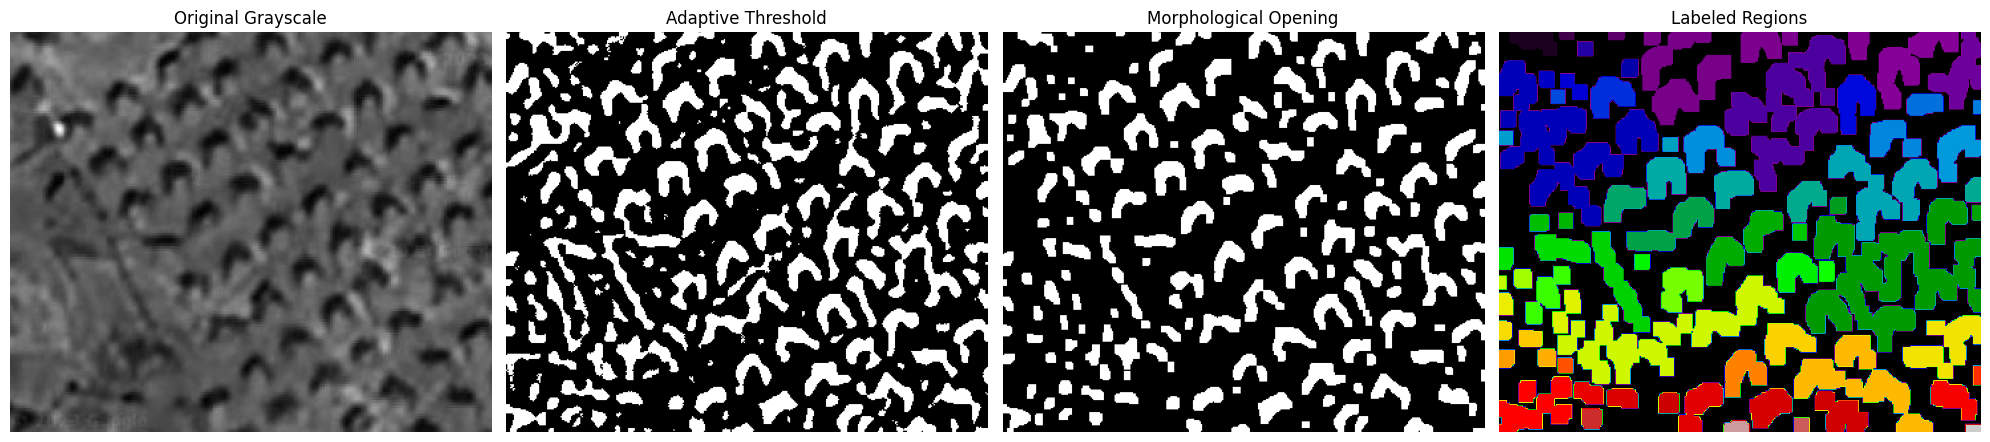

Estimated number of dragon fruit trees: 56


In [25]:
import cv2
from skimage import measure, morphology
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('h2.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the grayscale image to remove noise and improve thresholding
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Use adaptive thresholding to account for varying lighting conditions
# The block size and C value might need to be adjusted
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 21, 3)

# Perform a series of erosions and dilations to remove small blobs
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Dilate the image to connect components that are close to each other
dilated = cv2.dilate(opened, kernel, iterations=3)

# Label connected regions of an integer array using measure.label
labels = measure.label(dilated, background=0)

# Create a figure to visualize the steps
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Grayscale')
ax[1].imshow(binary, cmap='gray')
ax[1].set_title('Adaptive Threshold')
ax[2].imshow(opened, cmap='gray')
ax[2].set_title('Morphological Opening')
ax[3].imshow(labels, cmap='nipy_spectral')
ax[3].set_title('Labeled Regions')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Apply properties to filter out small objects and non-tree-like regions
props = measure.regionprops(labels)
tree_count = 0
for prop in props:
    # Consider area, solidity, and eccentricity to identify trees
    if prop.area > 50 and prop.solidity > 0.7 and prop.eccentricity < 0.9:
        tree_count += 1

print(f'Estimated number of dragon fruit trees: {tree_count}')
